<a href="https://colab.research.google.com/github/shellkuangx/Machine-Learning/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors


import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import norm
%matplotlib inline
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Part 1. Data preparation and visualization

In [ ]:
# Load Dataset
url= 'https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/dataset_assignment.csv'
df = pd.read_csv(url,error_bad_lines=False)
# General infomation of the dataset
print(df.head())
print(df.shape)
print(df.info())
print(df.describe(include=['float']))
print(df.describe(include=['object']))

   Identifier     sex   age   income  purchase
0    15624510    Male  19.0  19000.0       0.0
1    15810944    Male  35.0  20000.0       0.0
2    15668575  Female  26.0  43000.0       0.0
3    15603246  Female  27.0  57000.0       0.0
4    15804002    Male  19.0  76000.0       0.0
(502, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Identifier  502 non-null    int64  
 1   sex         502 non-null    object 
 2   age         481 non-null    float64
 3   income      476 non-null    float64
 4   purchase    482 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.7+ KB
None
              age         income    purchase
count  481.000000     476.000000  482.000000
mean    39.022869   69399.159664    0.394191
std     10.476437   33758.029366    0.489184
min     18.000000   15000.000000    0.000000
25%     31.000000   43000

In [ ]:
# detect missing data 
print(df.isna().sum())
print(df.isna().sum()/df.count())

Identifier     0
sex            0
age           21
income        26
purchase      20
dtype: int64
Identifier    0.000000
sex           0.000000
age           0.043659
income        0.054622
purchase      0.041494
dtype: float64


21 missing data in column 'age', 4.37%
26 missing data in column 'income', 5.46%
20 missing data in column 'purchase', 4.15%

In [ ]:
# 1.2 Delete all the rows containing the missing data. 
Mod_df = df.dropna()
print(Mod_df.shape)
Mod_df.isna().sum()

(438, 5)


Identifier    0
sex           0
age           0
income        0
purchase      0
dtype: int64

In [ ]:
# install category encoders
!pip install category_encoders

     |████████████████████████████████| 81kB 4.1MB/s 


64 rows containing missing data were deleted 

In [ ]:
# 1.3 Encode the data where necessary
import category_encoders as ce
# We choose dummy encoding because the variable is nominal
df_new =pd.get_dummies(data=Mod_df,drop_first=True, prefix=None)
# Chage the order of columns to ensure dependent variable is the last column
cols = df_new.columns.tolist()
cols = cols[0:1] + cols[-1:]+ cols[1:4]
df_new = df_new[cols]
df_new.rename(columns={"sex_Male":"sex"},inplace = True)
print(df_new.head())
print(df_new.info())

   Identifier  sex   age   income  purchase
0    15624510    1  19.0  19000.0       0.0
1    15810944    1  35.0  20000.0       0.0
2    15668575    0  26.0  43000.0       0.0
3    15603246    0  27.0  57000.0       0.0
4    15804002    1  19.0  76000.0       0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 481
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Identifier  438 non-null    int64  
 1   sex         438 non-null    uint8  
 2   age         438 non-null    float64
 3   income      438 non-null    float64
 4   purchase    438 non-null    float64
dtypes: float64(3), int64(1), uint8(1)
memory usage: 17.5 KB
None


Data Visualization with Seaborn

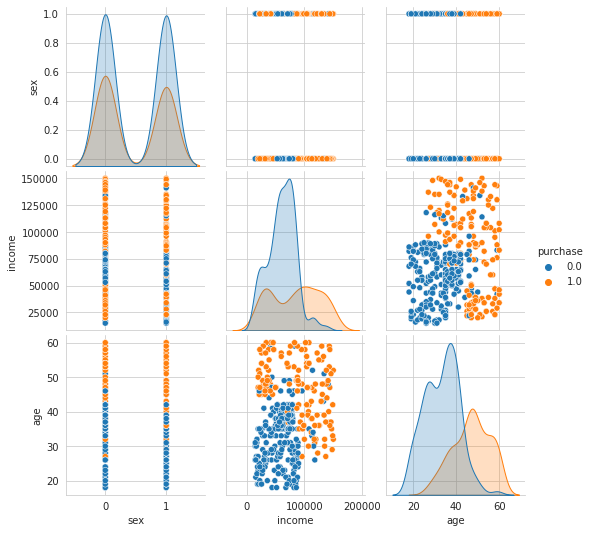

In [ ]:
# pairplot() uses a “small-multiple” approach to visualize the univariate distribution 
# of all variables in a dataset along with all of their pairwise relationships:
sns.pairplot(df_new[['sex','income','age','purchase']],hue='purchase')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


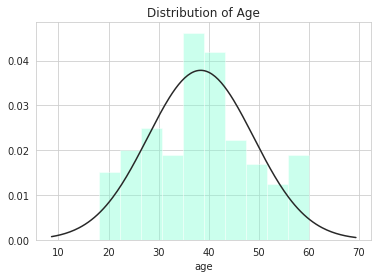

In [ ]:
# distribution plot of variable age
plot1 = sns.distplot(df_new.age,fit=norm, kde=False,color='aquamarine')
plt.title('Distribution of Age')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


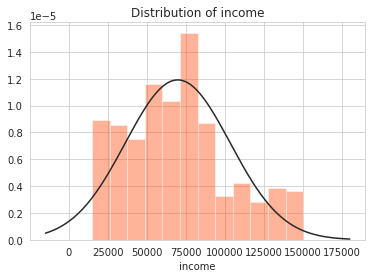

In [ ]:
# distribution plot of variable income
plot2 = sns.distplot(df_new.income,fit=norm, kde=False,color='orangered')
plt.title('Distribution of income')
plt.show()

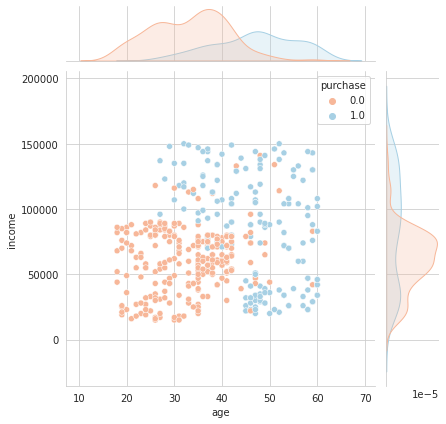

In [ ]:
plot3=sns.jointplot(data=df_new, x="age", y="income",hue='purchase',palette='RdBu')

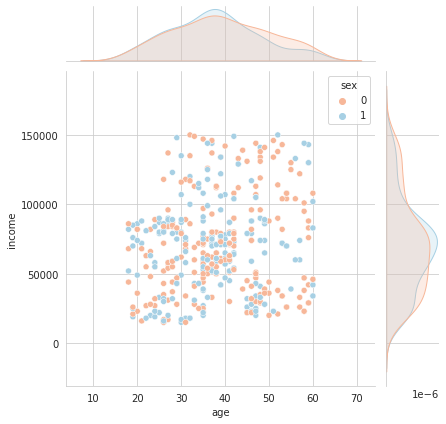

In [ ]:
plot4=sns.jointplot(data=df_new, x="age", y="income",hue='sex',palette='RdBu')

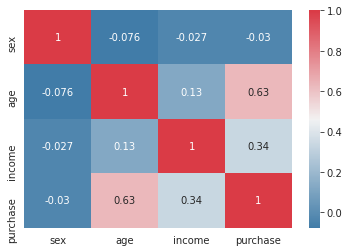

In [ ]:
cmap = sns.diverging_palette(240, 10, n=9,as_cmap=True)
plot5 = sns.heatmap(df_new.corr().loc['sex':, 'sex':],cmap=cmap,annot=True)

Correlation Matrix

In [ ]:
# 1.5. Produce the correlation matrix to make a first guess on usefulness of the predictors
corrMatrix = df_new.corr().loc['sex':, 'sex':]
print(corrMatrix)

               sex       age    income  purchase
sex       1.000000 -0.076477 -0.027163 -0.030211
age      -0.076477  1.000000  0.127944  0.632383
income   -0.027163  0.127944  1.000000  0.336978
purchase -0.030211  0.632383  0.336978  1.000000


Part 2. Inference by logistic regression

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


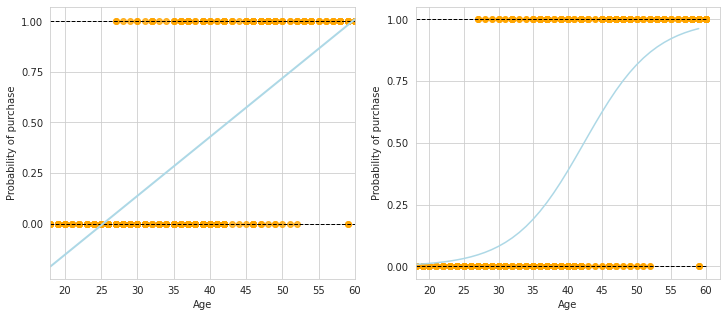

In [ ]:
# One-variable(age) logistic regression model 

X_train = df_new['age'].values.reshape(-1, 1)
y = df_new['purchase']

X_test = np.arange(df_new.age.min(), df_new.age.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
sns.regplot(X_train,y,order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train ,y , color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of purchase')
    ax.set_xlabel('Age')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=18)

In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
classes:  [0. 1.]
coefficients:  [[0.19566808]]
intercept : [-8.29376678]


In [ ]:
X_age = sm.add_constant(df_new.age)
# print(dir(smf))
print(y)
print("-----------------------")
print(X_age)

est = sm.Logit(y, X_age).fit()
est.summary2().tables[1]


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
477    0.0
478    0.0
479    0.0
480    0.0
481    0.0
Name: purchase, Length: 438, dtype: float64
-----------------------
     const   age
0      1.0  19.0
1      1.0  35.0
2      1.0  26.0
3      1.0  27.0
4      1.0  19.0
..     ...   ...
477    1.0  38.0
478    1.0  39.0
479    1.0  37.0
480    1.0  46.0
481    1.0  42.0

[438 rows x 2 columns]
Optimization terminated successfully.
         Current function value: 0.421050
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-8.296607,0.778136,-10.662155,1.530095e-26,-9.821725,-6.771488
age,0.195738,0.018919,10.346087,4.359394e-25,0.158657,0.232819


In [ ]:
X_income = sm.add_constant(df_new.income)

print(y)
print("----------------")
print(X_income)

est = sm.Logit(y, X_income).fit()
est.summary2().tables[1]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
477    0.0
478    0.0
479    0.0
480    0.0
481    0.0
Name: purchase, Length: 438, dtype: float64
----------------
     const   income
0      1.0  19000.0
1      1.0  20000.0
2      1.0  43000.0
3      1.0  57000.0
4      1.0  76000.0
..     ...      ...
477    1.0  71000.0
478    1.0  73000.0
479    1.0  80000.0
480    1.0  74000.0
481    1.0  53000.0

[438 rows x 2 columns]
Optimization terminated successfully.
         Current function value: 0.606375
         Iterations 5


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-2.081125,0.265361,-7.842629,4.412097e-15,-2.601222,-1.561027
income,0.000022,0.000003,6.674161,2.486504e-11,0.000016,0.000029


Multiple Logistic Regression

In [ ]:
X_train = sm.add_constant(df_new[['sex', 'income', 'age']])
print(X_train)
est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]


     const  sex   income   age
0      1.0    1  19000.0  19.0
1      1.0    1  20000.0  35.0
2      1.0    0  43000.0  26.0
3      1.0    0  57000.0  27.0
4      1.0    1  76000.0  19.0
..     ...  ...      ...   ...
477    1.0    1  71000.0  38.0
478    1.0    0  73000.0  39.0
479    1.0    0  80000.0  37.0
480    1.0    0  74000.0  46.0
481    1.0    0  53000.0  42.0

[438 rows x 4 columns]
Optimization terminated successfully.
         Current function value: 0.345068
         Iterations 8


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-13.505756,1.383003,-9.765526,1.582878e-22,-16.216393,-10.795119
sex,0.381606,0.291654,1.308421,1.907306e-01,-0.190025,0.953236
income,0.000038,0.000005,6.906750,4.958821e-12,0.000027,0.000049
age,0.251962,0.026634,9.460209,3.073279e-21,0.199761,0.304163


In [ ]:
# # balance and default vectors for female
# X_train = df_new[df_new.sex == 0].income.values.reshape(df_new[df_new.sex == 0].income.size,1) 
# y = df_new[df_new.sex == 0].purchase

# # balance and default vectors for male
# X_train2 = df_new[df_new.sex == 1].income.values.reshape(df_new[df_new.sex == 1].income.size,1) 
# y2 = df_new[df_new.sex == 1].purchase

# # Vector with balance values for plotting
# X_test = np.arange(df_new.income.min(), df_new.income.max()).reshape(-1,1)

# clf = skl_lm.LogisticRegression(solver='newton-cg')
# clf2 = skl_lm.LogisticRegression(solver='newton-cg')

# clf.fit(X_train,y)
# clf2.fit(X_train2,y2)

# prob = clf.predict_proba(X_test)
# prob2 = clf2.predict_proba(X_test)

Linear Discriminant Analysis

In [ ]:
X = df_new[['age', 'income', 'sex']].to_numpy()
y = df_new.purchase.to_numpy()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=2)

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X_train, y_train).predict(X)

df_ = pd.DataFrame({'True purchase status': y,
                    'Predicted purchase status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
confusion_matrix = df_.groupby(['Predicted purchase status','True purchase status']).size().unstack('True purchase status')

print(confusion_matrix)
print(classification_report(y, y_pred, target_names=['No', 'Yes']))


True purchase status        No  Yes
Predicted purchase status          
No                         250   46
Yes                         21  121
              precision    recall  f1-score   support

          No       0.84      0.92      0.88       271
         Yes       0.85      0.72      0.78       167

    accuracy                           0.85       438
   macro avg       0.85      0.82      0.83       438
weighted avg       0.85      0.85      0.84       438



In [ ]:
print(lda.priors_)
print(lda.means_)
print(lda.coef_)

[0.62745098 0.37254902]
[[3.33437500e+01 6.06093750e+04 5.00000000e-01]
 [4.73508772e+01 8.38245614e+04 4.29824561e-01]]
[[ 2.17248443e-01  2.88995632e-05 -1.75817843e-02]]


Quadratic Discriminant Analysis

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score
qda = QuadraticDiscriminantAnalysis()
y_pred = qda.fit(X_train, y_train).predict(X_test)
qda.priors_
qda.means_
cmat = confusion_matrix(y_test, y_pred)
print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print()
cmat1 = confusion_matrix(y_train,qda.fit(X_train, y_train).predict(X_train))
print(cmat1)
print('TP - True Negative {}'.format(cmat1[0,0]))
print('FP - False Positive {}'.format(cmat1[0,1]))
print('FN - False Negative {}'.format(cmat1[1,0]))
print('TP - True Positive {}'.format(cmat1[1,1]))
print()
print(classification_report(y_train,qda.fit(X_train, y_train).predict(X_train)))
print(classification_report(y_test, y_pred, digits=3))

[[74  5]
 [ 8 45]]
TP - True Negative 74
FP - False Positive 5
FN - False Negative 8
TP - True Positive 45

[[177  15]
 [ 14 100]]
TP - True Negative 177
FP - False Positive 15
FN - False Negative 14
TP - True Positive 100

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       192
         1.0       0.87      0.88      0.87       114

    accuracy                           0.91       306
   macro avg       0.90      0.90      0.90       306
weighted avg       0.91      0.91      0.91       306

              precision    recall  f1-score   support

         0.0      0.902     0.937     0.919        79
         1.0      0.900     0.849     0.874        53

    accuracy                          0.902       132
   macro avg      0.901     0.893     0.897       132
weighted avg      0.901     0.902     0.901       132



K-Nearest Neighbors

In [ ]:
# n_neighbors=1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Print out confusion matrix
cmat = confusion_matrix(y_test, y_pred)
print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))

print(classification_report(y_test, y_pred))



Logistic Regression

In [ ]:
# Train and Test data split
X_train,X_test,y_train,y_test = train_test_split(df_new[['age','income','sex','purchase']],df_new['purchase'],test_size=0.3,random_state=2)
# Fit logistic regression (sex,age,income)
formula = ('purchase ~ sex+age+income')
model = smf.glm(formula=formula,data=X_train,family=sm.families.Binomial())
result = model.fit()
result.summary()

The smallest p-value here is associated with age. The positive coefficient for this predictor suggests that if as the person gets older, he/she is more likely to make purchase decision. Similar with income. 
Both are quite significant, smaller than default threshold.

We use the .params attribute in order to access just the coefficients for this fitted model. Similarly, we can use .pvalues to get the p-values for the coefficients, and .model.endog_names to get the endogenous (or dependent) variables.

In [ ]:
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

In [ ]:
y_pred = result.predict(X_test)
predictions_nominal = [ 0.0 if x < 0.5 else 1.0 for x in y_pred]
print(classification_report(y_test, predictions_nominal, digits = 3))
print(confusion_matrix(y_test,predictions_nominal))

In [ ]:
# Train and Test data split
X_train2,X_test2,y_train2,y_test2 = train_test_split(df_new[['age','income','purchase']],df_new['purchase'],test_size=0.3,random_state=2)
# Fit logistic regression (age,income)
formula = ('purchase ~ age+income')
model = smf.glm(formula=formula,data=X_train2,family=sm.families.Binomial())
result = model.fit()
print(result.summary())
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)
y_pred2 = result.predict(X_test2)
predictions_nominal = [ 0.0 if x < 0.5 else 1.0 for x in y_pred]
print(classification_report(y_test2, predictions_nominal, digits = 3))
print(confusion_matrix(y_test2,predictions_nominal))

lr = skl_lm.LogisticRegression()




In [ ]:
# Add interactions into model 
# Quadratic
from sklearn.preprocessing import PolynomialFeatures
X_train,X_test,y_train,y_test = train_test_split(df_new[['age','income','sex']],df_new['purchase'],test_size=0.3,random_state=2)
poly = PolynomialFeatures(interaction_only=False,include_bias = False)
X_train2 = poly.fit_transform(X_train)
print(poly.get_feature_names(input_features=['age','income','sex']))
X_test2 = poly.fit_transform(X_test)








